### 方差分析
不考虑交互项

In [1]:
import pandas as pd
import scipy.stats as stats

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 目标变量和因素变量
target_variables = ['release_Doxy', 'release_TPC']
factors = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time']

# 清理数据：删除含有缺失值的行
df_clean = df.dropna()

# 执行方差分析（ANOVA）
anova_results = {}
for target in target_variables:
    anova_results[target] = {}
    for factor in factors:
        # 按照因素的唯一值分组，确保每个组有足够的样本
        groups = [df_clean[df_clean[factor] == value][target] for value in df_clean[factor].unique()]
        
        # 如果分组不足（少于2个组或组内样本少于2），跳过该因素
        if len(groups) < 2 or any(len(group) < 2 for group in groups):
            anova_results[target][factor] = {'F-statistic': None, 'p-value': None, 'message': 'Insufficient data'}
            continue
        
        # 执行ANOVA检验
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[target][factor] = {'F-statistic': f_stat, 'p-value': p_value}

# 输出结果
anova_results


{'release_Doxy': {'PVA': {'F-statistic': 24.40345820545225,
   'p-value': 1.361649971730158e-10},
  'Agarose': {'F-statistic': 14.318461618008286,
   'p-value': 1.105306392152562e-06},
  'TPC_content': {'F-statistic': 1.990439723498088,
   'p-value': 0.13831817769981464},
  'freeze_thaw cycle': {'F-statistic': 0.1253241980719518,
   'p-value': 0.7235619016830344},
  'time': {'F-statistic': 29.640296697972666,
   'p-value': 1.0675439612898236e-24}},
 'release_TPC': {'PVA': {'F-statistic': 22.914934846353948,
   'p-value': 4.982814373734996e-10},
  'Agarose': {'F-statistic': 10.961320738755022,
   'p-value': 2.4835560282386548e-05},
  'TPC_content': {'F-statistic': 5.7795432027244535,
   'p-value': 0.003420679180302454},
  'freeze_thaw cycle': {'F-statistic': 1.3781736990535598,
   'p-value': 0.24128001995318885},
  'time': {'F-statistic': 42.29608081306771,
   'p-value': 2.429835033788174e-33}}}

考虑交互项

In [5]:
import pandas as pd
import scipy.stats as stats

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 目标变量和因素变量
target_variables = ['release_Doxy', 'release_TPC']
factors = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time']

# 清理数据：删除含有缺失值的行
df_clean = df.dropna()

# 创建交互项
df_clean['PVA_time'] = df_clean['PVA'] * df_clean['time']
df_clean['Agarose_TPC_content'] = df_clean['Agarose'] * df_clean['TPC_content']
df_clean['PVA_Agarose'] = df_clean['PVA'] * df_clean['Agarose']
df_clean['PVA_freeze_thaw'] = df_clean['PVA'] * df_clean['freeze_thaw cycle']

# 执行方差分析（ANOVA）
anova_results_with_interaction = {}

for target in target_variables:
    anova_results_with_interaction[target] = {}
    for factor in factors + ['PVA_time', 'Agarose_TPC_content', 'PVA_Agarose', 'PVA_freeze_thaw']:
        # 按照因素的唯一值分组，确保每个组有足够的样本
        groups = [df_clean[df_clean[factor] == value][target] for value in df_clean[factor].unique()]
        
        # 如果分组不足（少于2个组或组内样本少于2），跳过该因素
        if len(groups) < 2 or any(len(group) < 2 for group in groups):
            anova_results_with_interaction[target][factor] = {'F-statistic': None, 'p-value': None, 'message': 'Insufficient data'}
            continue
        
        # 执行ANOVA检验
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results_with_interaction[target][factor] = {'F-statistic': f_stat, 'p-value': p_value}

# 将结果转换为 DataFrame 并输出到 Excel 文件
result_data = []

for target in anova_results_with_interaction:
    for factor, stats in anova_results_with_interaction[target].items():
        result_data.append([target, factor, stats['F-statistic'], stats['p-value']])

# 转换为 DataFrame
anova_df = pd.DataFrame(result_data, columns=['Target Variable', 'Factor/Interaction', 'F-statistic', 'p-value'])

# 保存为 Excel 文件
output_file = '包含交互项的方差检验结果.xlsx'
anova_df.to_excel(output_file, index=False)

output_file  # 返回文件路径供用户下载


'包含交互项的方差检验结果.xlsx'

In [14]:
import pandas as pd
import scipy.stats as stats
from itertools import combinations, permutations

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 目标变量和因素变量
target_variables = ['release_Doxy', 'release_TPC']
factors = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time']

# 清理数据：删除含有缺失值的行
df_clean = df.dropna()

# 创建所有可能的交互项，包括单个因素、二阶、三阶交互项
# 单因素交互项（即每个因素本身）
for factor in factors:
    df_clean[f'{factor}'] = df_clean[factor]

# 二阶交互项
for factor1, factor2 in combinations(factors, 2):
    df_clean[f'{factor1}×{factor2}'] = df_clean[factor1] * df_clean[factor2]

# 执行方差分析（ANOVA）
anova_results_with_interaction = {}

for target in target_variables:
    anova_results_with_interaction[target] = {}
    for factor in df_clean.columns:  # 包括所有生成的交互项
        if factor not in ['release_Doxy', 'release_TPC']:  # 排除目标变量本身
            # 按照因素的唯一值分组，确保每个组有足够的样本
            groups = [df_clean[df_clean[factor] == value][target] for value in df_clean[factor].unique()]
        
            # 如果分组不足（少于2个组或组内样本少于2），跳过该因素
            if len(groups) < 2 or any(len(group) < 2 for group in groups):
                anova_results_with_interaction[target][factor] = {'F-statistic': None, 'p-value': None, 'message': 'Insufficient data'}
                continue
        
            # 执行ANOVA检验
            f_stat, p_value = stats.f_oneway(*groups)
            anova_results_with_interaction[target][factor] = {'F-statistic': f_stat, 'p-value': p_value}

# 将结果转换为 DataFrame 并输出到 Excel 文件
result_data = []

for target in anova_results_with_interaction:
    for factor, stats in anova_results_with_interaction[target].items():
        result_data.append([target, factor, stats['F-statistic'], stats['p-value']])

# 转换为 DataFrame
anova_df = pd.DataFrame(result_data, columns=['Target Variable', 'Factor/Interaction', 'F-statistic', 'p-value'])

# 保存为 Excel 文件
output_file = '包含所有交互项的方差检验结果.xlsx'
anova_df.to_excel(output_file, index=False)

output_file  # 返回文件路径供用户下载


'包含所有交互项的方差检验结果.xlsx'

使用lasso回归去除多重共线性较强的特征，对二阶交互项进行挑选

In [16]:
import pandas as pd
import scipy.stats as stats
from itertools import combinations
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 目标变量和因素变量
target_variables = ['release_Doxy', 'release_TPC']
factors = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time']

# 清理数据：删除含有缺失值的行
df_clean = df.dropna()

# 创建二阶交互项（只考虑交互项，不包括一阶特征）
for factor1, factor2 in combinations(factors, 2):
    df_clean[f'{factor1}×{factor2}'] = df_clean[factor1] * df_clean[factor2]

# 特征选择：使用Lasso回归只对二阶交互项进行选择
X = df_clean[[col for col in df_clean.columns if '×' in col]]  # 只选取二阶交互项
y = df_clean[target_variables[0]]  # 选择第一个目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用LassoCV进行自动正则化并选择特征
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# 查看Lasso回归系数
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# 选出非零系数的特征
selected_features = lasso_coef[lasso_coef != 0].index.tolist()

# 只对选中的特征进行ANOVA检验
anova_results_with_interaction = {}

for target in target_variables:
    anova_results_with_interaction[target] = {}
    for factor in selected_features:  # 只考虑Lasso选择的二阶交互项
        if factor not in ['release_Doxy', 'release_TPC']:  # 排除目标变量本身
            # 按照因素的唯一值分组，确保每个组有足够的样本
            groups = [df_clean[df_clean[factor] == value][target] for value in df_clean[factor].unique()]
        
            # 如果分组不足（少于2个组或组内样本少于2），跳过该因素
            if len(groups) < 2 or any(len(group) < 2 for group in groups):
                anova_results_with_interaction[target][factor] = {'F-statistic': None, 'p-value': None, 'message': 'Insufficient data'}
                continue
        
            # 执行ANOVA检验
            f_stat, p_value = stats.f_oneway(*groups)
            anova_results_with_interaction[target][factor] = {'F-statistic': f_stat, 'p-value': p_value}

# 将结果转换为 DataFrame 并输出到 Excel 文件
result_data = []

for target in anova_results_with_interaction:
    for factor, stats in anova_results_with_interaction[target].items():
        result_data.append([target, factor, stats['F-statistic'], stats['p-value']])

# 转换为 DataFrame
anova_df = pd.DataFrame(result_data, columns=['Target Variable', 'Factor/Interaction', 'F-statistic', 'p-value'])

# 保存为 Excel 文件
output_file = 'Lasso只选择二阶交互项的方差检验结果.xlsx'
anova_df.to_excel(output_file, index=False)

output_file  # 返回文件路径供用户下载


'Lasso只选择二阶交互项的方差检验结果.xlsx'

输出通过检验的包含交互项的数据集
经过方差分析和lasso回归选取的指标有：
doxy：1.PVA 2.Agarose 3.time 4.PVA×TPC_content 5.Agarose×TPC_content 6.TPC_content×time 7.freeze_thaw cycle×time
tpc：1.PVA 2.Agarose 3.TPC_content 4.time 5.PVA×TPC_content 6.Agarose×TPC_content 7.TPC_content×freeze_thaw cycle 8.TPC_content×time 9.freeze_thaw cycle×time

In [10]:
import pandas as pd

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 清理数据：删除缺失值
df_clean = df.dropna()

# 创建显著交互项
df_clean['PVA X time'] = df_clean['PVA'] * df_clean['time']
df_clean['Agarose X TPC_content'] = df_clean['Agarose'] * df_clean['TPC_content']
df_clean['PVA X Agarose'] = df_clean['PVA'] * df_clean['Agarose']
df_clean['PVA X freeze_thaw'] = df_clean['PVA'] * df_clean['freeze_thaw cycle']

# 建立包含所有因素的数据集

# 为release_Doxy创建包含显著交互项的新数据集
features_doxy = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time', 
                 'PVA X time', 'Agarose X TPC_content', 'PVA X Agarose', 'PVA X freeze_thaw']
X_doxy = df_clean[features_doxy]
y_doxy = df_clean['release_Doxy']

# 为release_TPC创建包含显著交互项的新数据集
features_tpc = ['PVA', 'Agarose', 'TPC_content', 'freeze_thaw cycle', 'time', 
                'PVA X time', 'Agarose X TPC_content', 'PVA X Agarose', 'PVA X freeze_thaw']
X_tpc = df_clean[features_tpc]
y_tpc = df_clean['release_TPC']

# 合并X和y，创建最终的数据集
doxy_data = pd.concat([X_doxy, y_doxy], axis=1)
tpc_data = pd.concat([X_tpc, y_tpc], axis=1)

# 输出为Excel文件
output_file = '包含交互项数据集.xlsx'
with pd.ExcelWriter(output_file) as writer:
    doxy_data.to_excel(writer, sheet_name='release_Doxy', index=False)
    tpc_data.to_excel(writer, sheet_name='release_TPC', index=False)

print(f"文件已保存为 {output_file}")


文件已保存为 包含交互项数据集.xlsx


In [18]:
import pandas as pd

# 读取数据
file_path = '样本池2.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 清理数据：删除缺失值
df_clean = df.dropna()

# 创建显著交互项
df_clean['PVA X time'] = df_clean['PVA'] * df_clean['time']
df_clean['Agarose X TPC_content'] = df_clean['Agarose'] * df_clean['TPC_content']
df_clean['PVA X Agarose'] = df_clean['PVA'] * df_clean['Agarose']
df_clean['PVA X freeze_thaw'] = df_clean['PVA'] * df_clean['freeze_thaw cycle']
df_clean['Agarose X freeze_thaw'] = df_clean['Agarose'] * df_clean['freeze_thaw cycle']
df_clean['TPC_content X time'] = df_clean['TPC_content'] * df_clean['time']
df_clean['freeze_thaw cycle X time'] = df_clean['freeze_thaw cycle'] * df_clean['time']
df_clean['PVA X TPC_content'] = df_clean['PVA'] * df_clean['TPC_content']
df_clean['Agarose X TPC_content'] = df_clean['Agarose'] * df_clean['TPC_content']
df_clean['TPC_content X freeze_thaw cycle'] = df_clean['TPC_content'] * df_clean['freeze_thaw cycle']

# 为release_Doxy创建包含显著交互项的新数据集
features_doxy = ['PVA', 'Agarose', 'time', 'PVA X TPC_content', 'Agarose X TPC_content', 'TPC_content X time', 'freeze_thaw cycle X time']
X_doxy = df_clean[features_doxy]
y_doxy = df_clean['release_Doxy']

# 为release_TPC创建包含显著交互项的新数据集
features_tpc = ['PVA', 'Agarose', 'TPC_content', 'time', 
                'PVA X TPC_content', 'Agarose X TPC_content', 'TPC_content X freeze_thaw cycle', 'TPC_content X time', 'freeze_thaw cycle X time']
X_tpc = df_clean[features_tpc]
y_tpc = df_clean['release_TPC']

# 合并X和y，创建最终的数据集
doxy_data = pd.concat([X_doxy, y_doxy], axis=1)
tpc_data = pd.concat([X_tpc, y_tpc], axis=1)

# 输出为Excel文件
output_file = '包含交互项数据集.xlsx'
with pd.ExcelWriter(output_file) as writer:
    doxy_data.to_excel(writer, sheet_name='release_Doxy', index=False)
    tpc_data.to_excel(writer, sheet_name='release_TPC', index=False)


print(f"文件已保存为 {output_file}")


文件已保存为 包含交互项数据集.xlsx


### 聚类加相关度

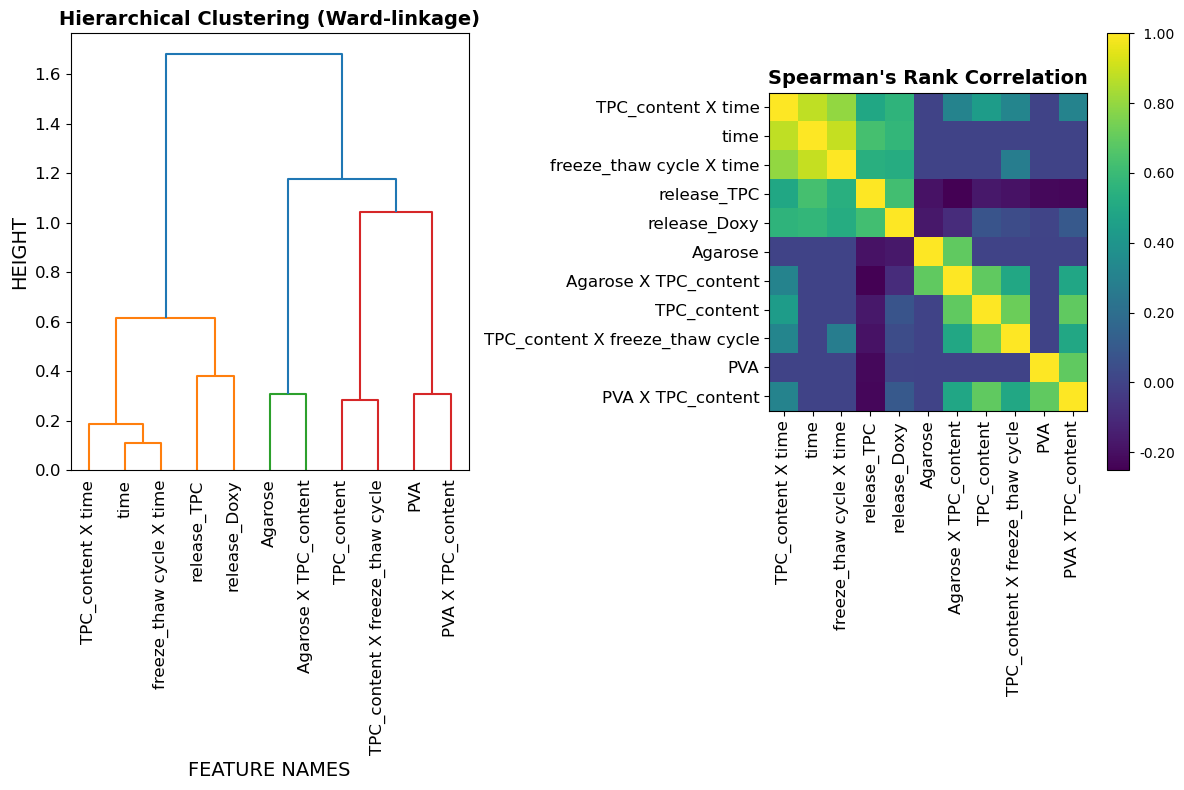

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# 读取数据
file_path = '包含交互项数据集.xlsx'  # 请根据实际路径修改
data = pd.read_excel(file_path, sheet_name='all')

# 选择数值型列进行相关性分析
numeric_columns = ['PVA', 'Agarose', 'TPC_content', 'time', 'PVA X TPC_content', 'Agarose X TPC_content', 'TPC_content X time', 'freeze_thaw cycle X time', 'TPC_content X freeze_thaw cycle', 'release_TPC', 'release_Doxy']

# 计算Spearman相关性矩阵
corr = spearmanr(data[numeric_columns]).correlation
corr = (corr + corr.T) / 2  # 确保矩阵对称
np.fill_diagonal(corr, 1)

# 将相关性矩阵转换为距离矩阵
distance_matrix = 1 - np.abs(corr)

# 使用Ward's linkage进行层次聚类
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# 层次聚类的树状图（dendrogram）
dendro = hierarchy.dendrogram(
    dist_linkage, labels=numeric_columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.set_title("Hierarchical Clustering (Ward-linkage)", fontsize=14, color="black", weight="bold")
ax1.set_xlabel('FEATURE NAMES', fontsize=14, color="black")
ax1.set_ylabel('HEIGHT', fontsize=14, color="black")
ax1.tick_params(axis='y', which='both', labelsize=12)
ax1.tick_params(axis='x', which='both', labelsize=12)

# Spearman秩相关的热力图
im = ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], alpha=1.0)
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
ax2.figure.colorbar(im, format='% .2f')
ax2.tick_params(axis='y', which='both', labelsize=12)
ax2.tick_params(axis='x', which='both', labelsize=12)
ax2.set_title("Spearman's Rank Correlation", fontsize=14, color="black", weight="bold")

# 调整布局以便更好显示
fig.tight_layout()

# 显示图表
plt.show()


不同时刻的相关热力图


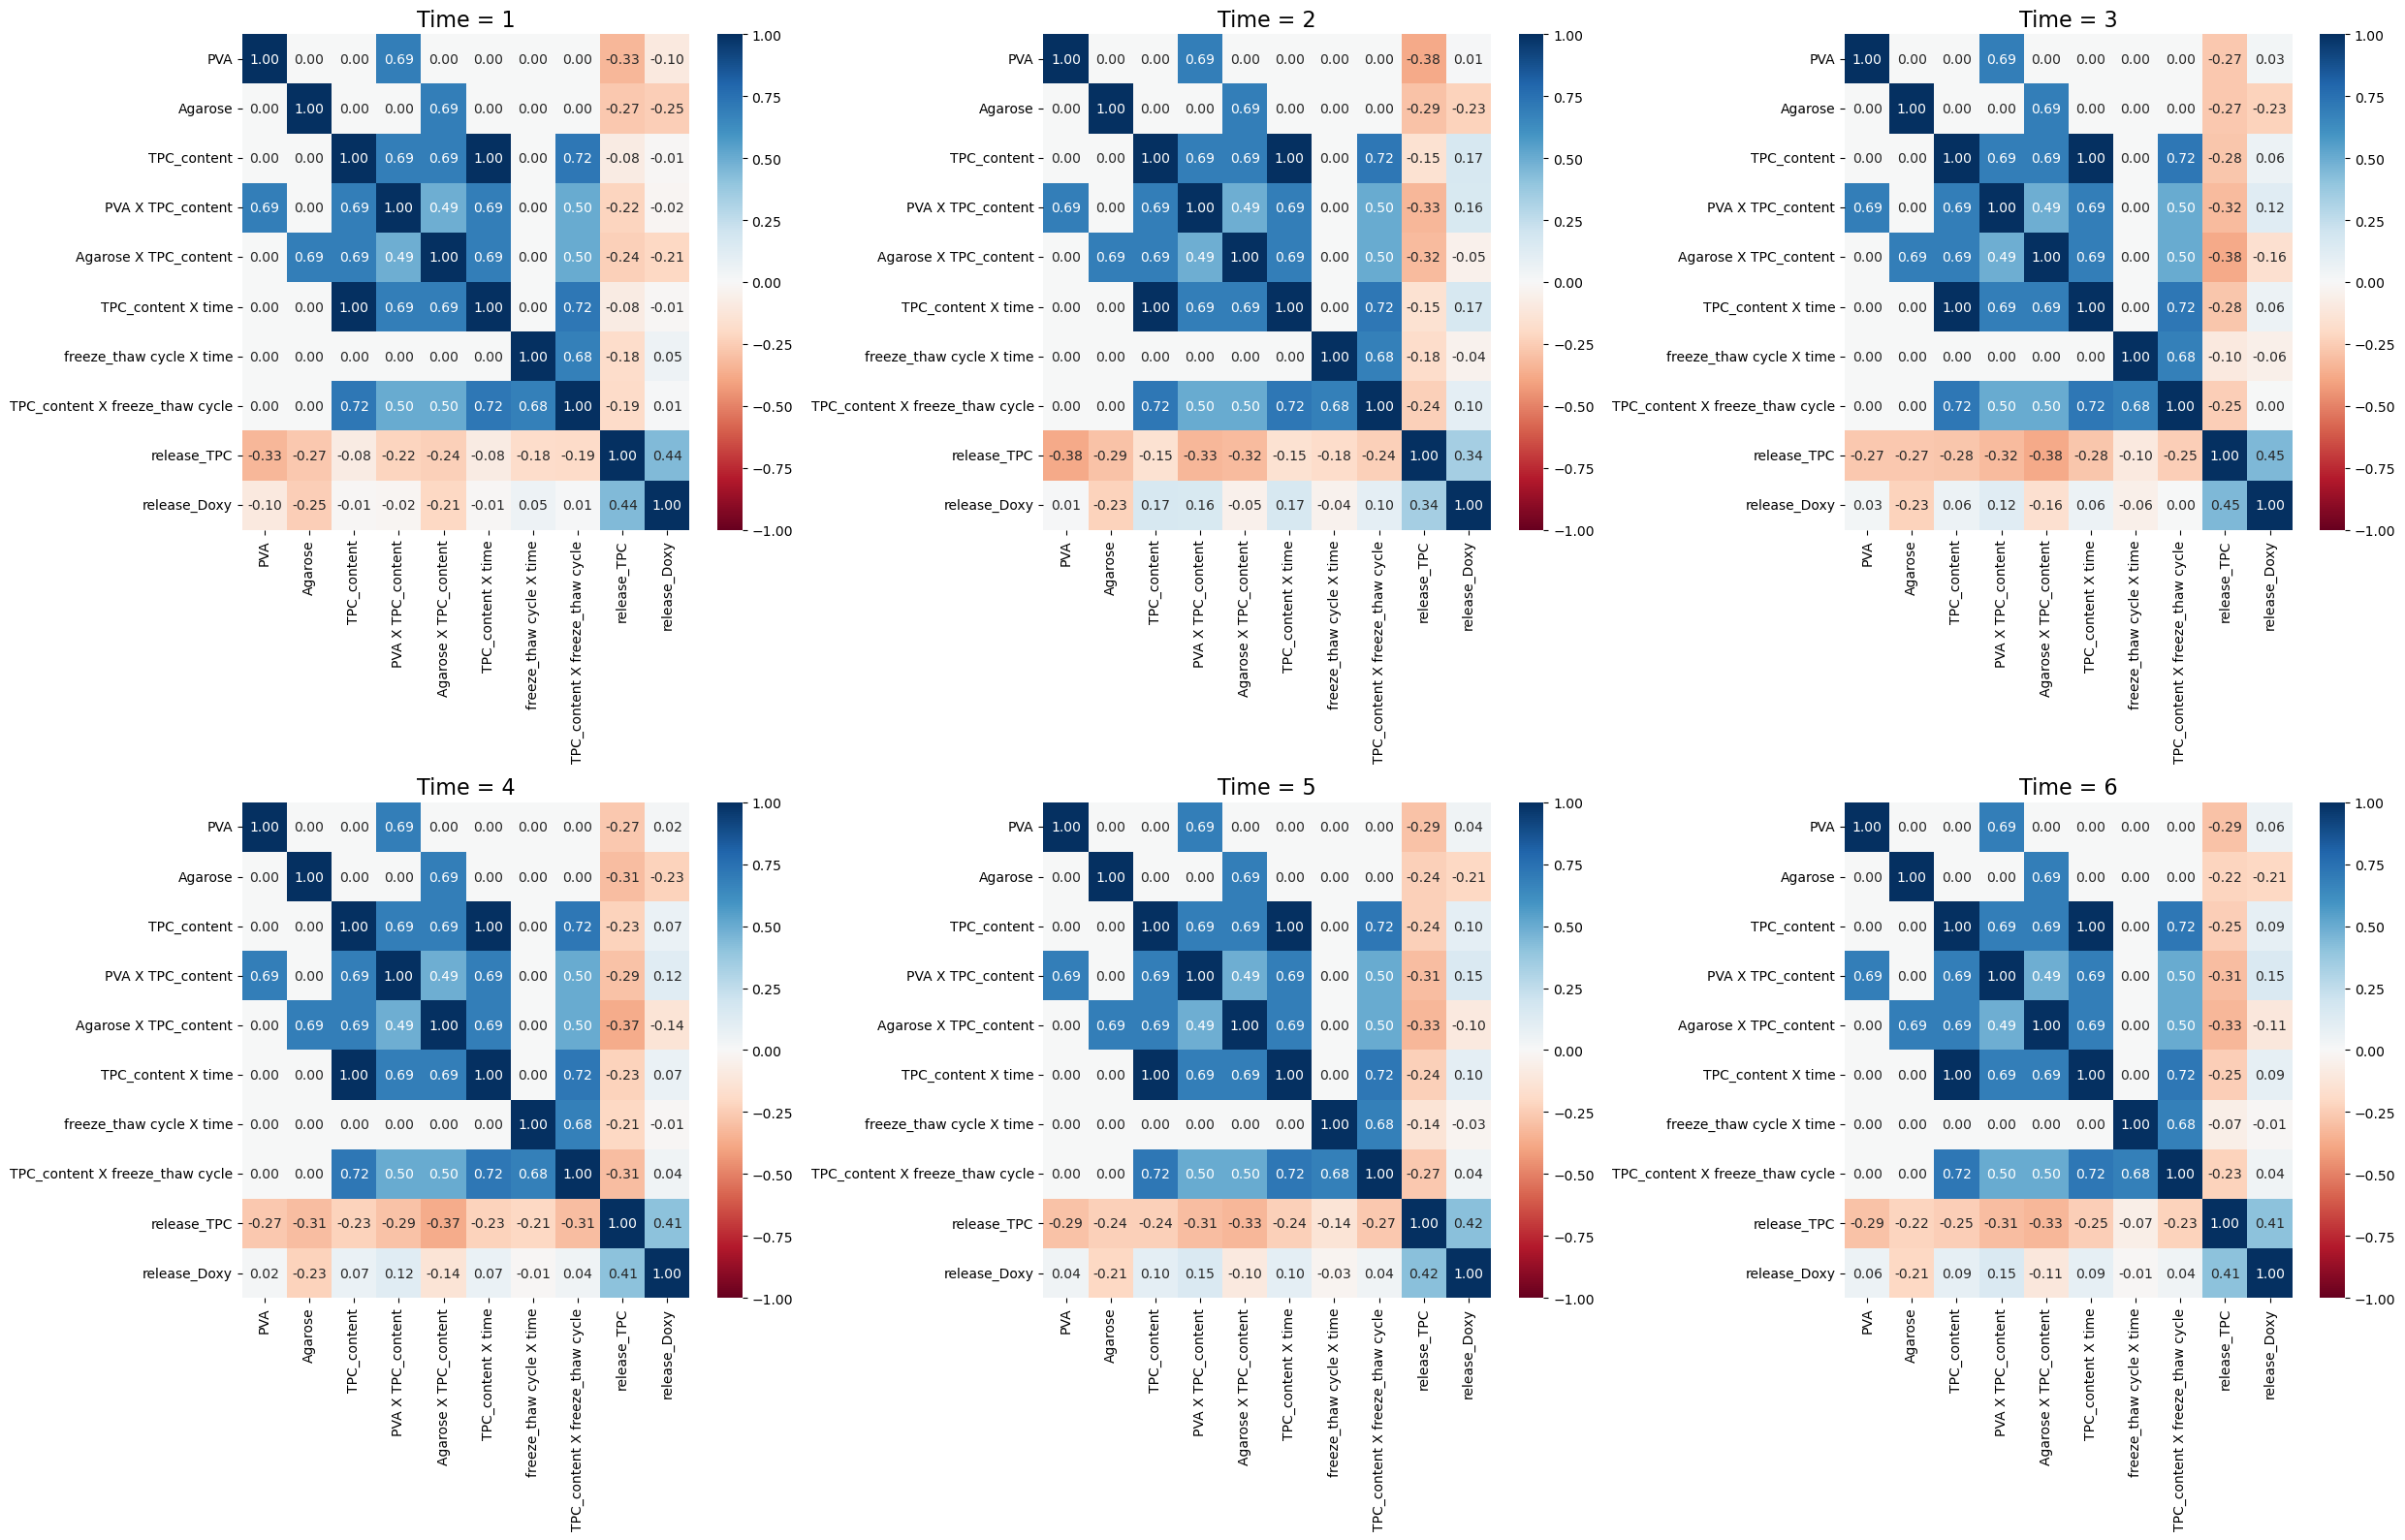

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = '包含交互项数据集.xlsx'
data_new = pd.read_excel(file_path, sheet_name='all')

# 选择数值型列进行相关性分析
numeric_columns_new = ['PVA', 'Agarose', 'TPC_content', 'PVA X TPC_content', 
                       'Agarose X TPC_content', 'TPC_content X time', 'freeze_thaw cycle X time', 
                       'TPC_content X freeze_thaw cycle', 'release_TPC', 'release_Doxy']

# 获取不同的 time 值
time_values = [1, 2, 3, 4, 5, 6]

# 创建图表
plt.figure(figsize=(25, 16))  # 增加图表大小

# 遍历不同的 time 值，创建多个子图
for idx, t in enumerate(time_values):
    
    # 子图 idx + 1
    plt.subplot(2, 3, idx + 1)
    
    # 选择对应时间点的数据
    time_data = data_new[data_new['time'] == t][numeric_columns_new]
    
    # 计算相关性矩阵
    correlations = time_data.corr(method='spearman')
    
    # 绘制热力图
    sns.heatmap(round(correlations, 2), cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.2f', 
                annot_kws={'size': 10}, xticklabels=numeric_columns_new, yticklabels=numeric_columns_new,
                cbar_kws={'shrink': 1})  # 控制颜色条大小
    
    # 添加标题
    plt.title(f"Time = {t}", fontsize=16)

# 调整布局并显示图表
plt.tight_layout()
plt.show()


聚类加相关

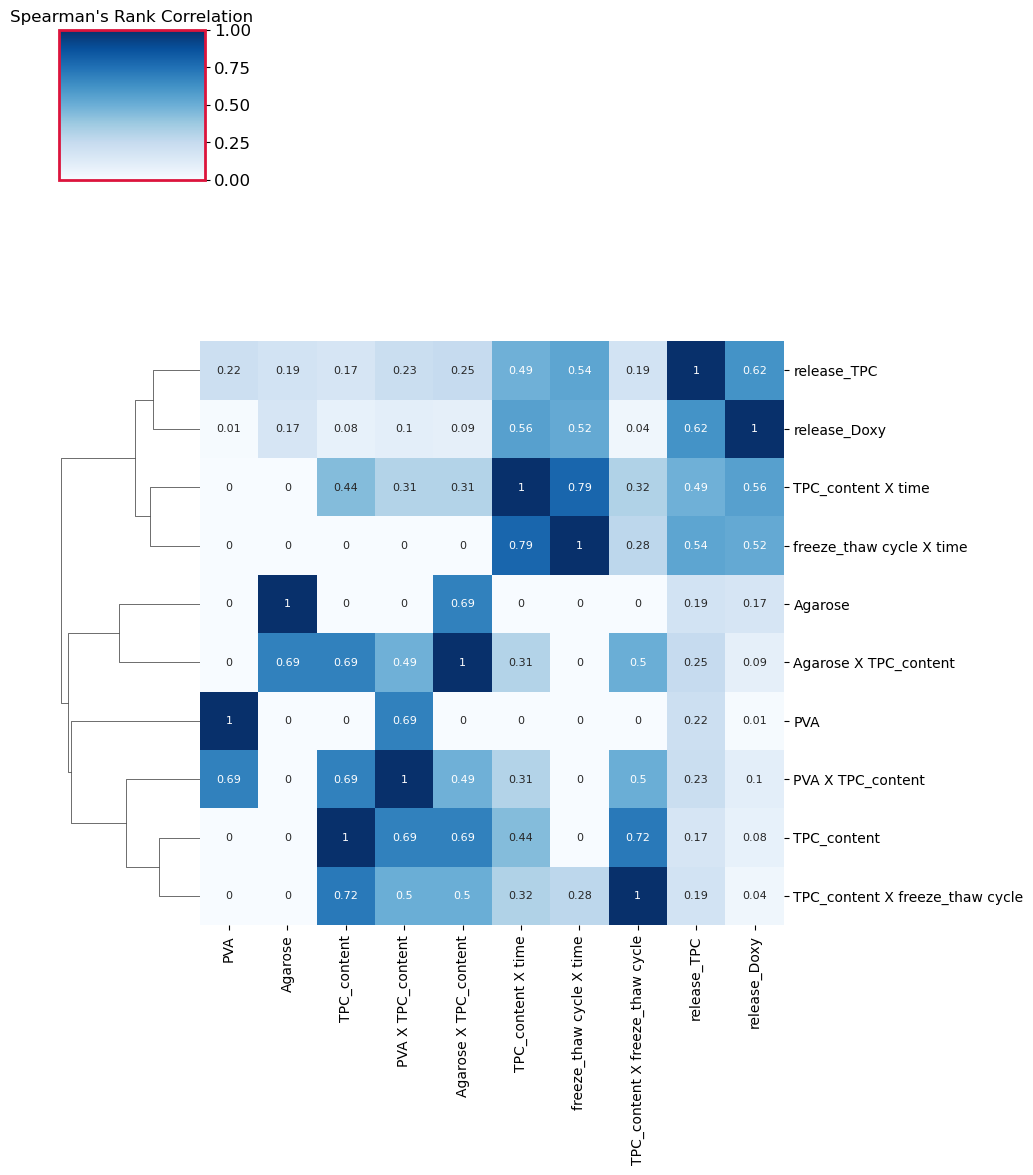

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the new dataset
file_path = '包含交互项数据集.xlsx'
data = pd.read_excel(file_path, sheet_name='all')

# Select numerical columns for correlation analysis
numeric_columns = ['PVA', 'Agarose', 'TPC_content', 'PVA X TPC_content', 
                       'Agarose X TPC_content', 'TPC_content X time', 'freeze_thaw cycle X time', 
                       'TPC_content X freeze_thaw cycle', 'release_TPC', 'release_Doxy']

# Calculate the correlation matrix
corr = data[numeric_columns].corr(method='spearman')

# Set up the color palette list
my_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
           'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
           'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
           'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
           'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
           'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
           'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
           'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 
           'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
           'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
           'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
           'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
           'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']

# Plot the clustermap
g = sns.clustermap(round(np.abs(corr), 2), method="complete", cmap=my_list[2], annot=True, annot_kws={"size": 8}, 
                   vmin=0, vmax=1, figsize=(10, 10), col_cluster=False)

# Adjust the colorbar
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 1.0, g.ax_row_dendrogram.get_position().width, 0.15])
g.ax_cbar.set_title("Spearman's Rank Correlation")
g.ax_cbar.tick_params(axis='x', length=10)

# Customize the colorbar spines
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('crimson')
    g.ax_cbar.spines[spine].set_linewidth(2)

# Customize ticks
plt.tick_params(axis='y', which='both', labelsize=12)
plt.tick_params(axis='x', which='both', labelsize=12)

# Display the plot
plt.show()


格兰杰因果检验

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 读取数据
file_path = '样本池2.csv'  # 请替换为实际路径
data = pd.read_csv(file_path)

# 提取相关列进行格兰杰因果检验
data_granger = data[['release_Doxy', 'release_TPC']]

# 进行格兰杰因果检验，滞后期数为 3
result = grangercausalitytests(data_granger, maxlag=3, verbose=False)

# 提取检验结果的 p 值
p_values = {}
for lag in result:
    p_values[lag] = {
        'ssr_ftest_pvalue': result[lag][0]['ssr_ftest'][1],
        'ssr_chi2test_pvalue': result[lag][0]['ssr_chi2test'][1],
        'lrtest_pvalue': result[lag][0]['lrtest'][1]
    }

# 输出结果
print("Overall Granger Causality Test Results:")
for lag, p_value in p_values.items():
    print(f"  Lag {lag}: SSR F-test p-value = {p_value['ssr_ftest_pvalue']}, SSR Chi2-test p-value = {p_value['ssr_chi2test_pvalue']}, LR-test p-value = {p_value['lrtest_pvalue']}")


Overall Granger Causality Test Results:
  Lag 1: SSR F-test p-value = 0.003291067627688127, SSR Chi2-test p-value = 0.0029270885482098265, LR-test p-value = 0.0031246198387190277
  Lag 2: SSR F-test p-value = 0.002129241297900783, SSR Chi2-test p-value = 0.0017089387598749315, LR-test p-value = 0.001932338992660337
  Lag 3: SSR F-test p-value = 0.0013361537830229807, SSR Chi2-test p-value = 0.0009475973563215354, LR-test p-value = 0.001146956301387578


e:\studysoft\anaconda\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
